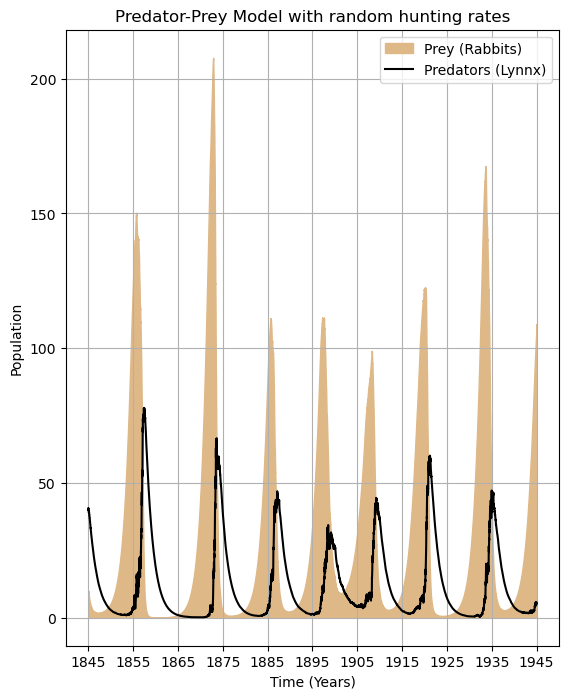

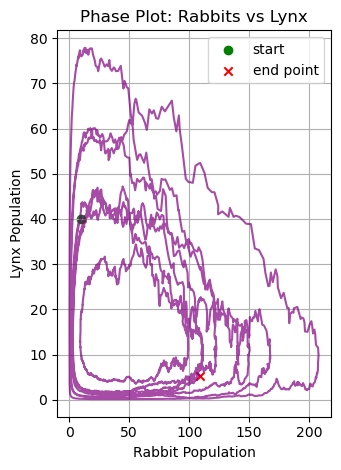

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters 
a = 0.8     # Rabbit birth rate
b = 0.02    # lynnx predation rate on rabbits
c = 0.6     #lynnx natural death rate 
K = 500     # Carrying capacity of the environment for rabbits
#h = 0.9     # Habitat effect or other natural reasons for lynxx birth rate
Dt = 0.01   # Time step

# Initialize populations
def initialize():
    global x, y, xresult, yresult, t, timesteps
    x, y = 10, 40  # Initial populations (rabbits & Lynxx)
    xresult, yresult = [x], [y]
    t = 1845 #0.0
    timesteps = [t]

# Record current values
def observe():
    xresult.append(x)
    yresult.append(y)
    timesteps.append(t)

# Update function with environmental constraints
def update():
    global x, y, t

    # Rabbit population 
    nextx = x + (a * x * (1 - x/K) - np.random.normal(0.06, 0.02) * x * y) * Dt  # introduced a random parameter for predation rate

    # Lynxx population
    nexty = y + (-c * y + np.random.normal(0.06, 0.02)* x * y* np.random.normal(0.3,0.9) ) * Dt #introduced a random parameter for predation rate or lynnx birth rate du to predation of lynnx and a random paramter for natural birth rate of lynnx

    # Update values at each time step
    x, y = nextx, nexty
    t += Dt

# Run simulation for 100 years
initialize()
while t < 1945:  # Simulate for 100 years
    update()
    observe()

# Plot results
plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)
plt.fill_between(timesteps, xresult, color='#DEB887', alpha=1 , label="Prey (Rabbits)")
plt.plot(timesteps, yresult, 'black', label="Predators (Lynnx)")
plt.xlabel("Time (Years)")
plt.ylabel("Population")
plt.title("Predator-Prey Model with random hunting rates")
plt.legend()
plt.xticks(np.arange(1845, 1946, 10))
plt.grid()
plt.show()


plt.subplot(1, 2, 2)
plt.plot(xresult, yresult, color='purple', alpha=0.7)
plt.scatter(xresult[0], yresult[0], color='green', marker='o',label= 'start')  # Mark start point
plt.scatter(xresult[-1], yresult[-1], color='red', marker='x',label= 'end point')  # Mark end point
plt.xlabel("Rabbit Population")
plt.ylabel("Lynx Population")
plt.title("Phase Plot: Rabbits vs Lynx")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()
